In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib as plt
import matplotlib.pyplot as plt

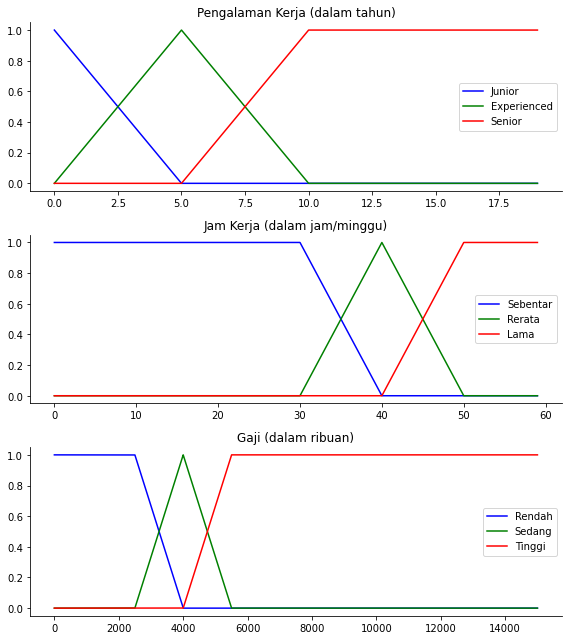

In [2]:
x_pk = np.arange(0, 20, 1) #pengalaman kerja - dalam tahun
x_jk = np.arange(0, 60, 1) #jam kerja per minggu - dalam jam
x_gaji  = np.arange(0, 15000, 1) #gaji - dalam ribuan

# Generate fuzzy membership functions
pk_junior = fuzz.trimf(x_pk, [0, 0, 5])
pk_experienced = fuzz.trimf(x_pk, [0, 5, 10])
pk_senior = fuzz.trapmf(x_pk, [5, 10, 20,20])
jk_sebentar = fuzz.trapmf(x_jk, [0,0, 30, 40])
jk_rerata = fuzz.trimf(x_jk, [30, 40, 50])
jk_lama = fuzz.trapmf(x_jk, [40, 50, 60,60])
gaji_rendah = fuzz.trapmf(x_gaji, [0,0, 2500, 4000])
gaji_sedang = fuzz.trimf(x_gaji, [2500, 4000, 5500])
gaji_tinggi = fuzz.trapmf(x_gaji, [4000,5500,15000,15000])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_pk, pk_junior, 'b', linewidth=1.5, label='Junior')
ax0.plot(x_pk, pk_experienced, 'g', linewidth=1.5, label='Experienced')
ax0.plot(x_pk, pk_senior, 'r', linewidth=1.5, label='Senior')
ax0.set_title('Pengalaman Kerja (dalam tahun)')
ax0.legend()

ax1.plot(x_jk, jk_sebentar, 'b', linewidth=1.5, label='Sebentar')
ax1.plot(x_jk, jk_rerata, 'g', linewidth=1.5, label='Rerata')
ax1.plot(x_jk, jk_lama, 'r', linewidth=1.5, label='Lama')
ax1.set_title('Jam Kerja (dalam jam/minggu)')
ax1.legend()

ax2.plot(x_gaji, gaji_rendah, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_gaji, gaji_sedang, 'g', linewidth=1.5, label='Sedang')
ax2.plot(x_gaji, gaji_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Gaji (dalam ribuan)')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

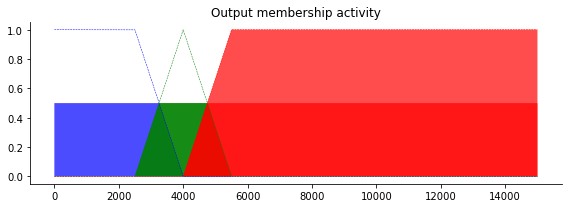

In [5]:
level_pk_jun = fuzz.interp_membership(x_pk, pk_junior, 7.5)
level_pk_exp = fuzz.interp_membership(x_pk, pk_experienced, 7.5)
level_pk_sen = fuzz.interp_membership(x_pk, pk_senior, 7.5)

level_jk_seb = fuzz.interp_membership(x_jk, jk_sebentar, 50)
level_jk_rer = fuzz.interp_membership(x_jk, jk_rerata, 50)
level_jk_lam = fuzz.interp_membership(x_jk, jk_lama, 50)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(level_jk_rer, level_pk_sen)
active_rule2 = np.fmax(level_jk_seb, level_pk_sen)
active_rule3 = np.fmax(level_jk_rer, level_pk_exp)
active_rule4 = np.fmax(level_jk_seb, level_pk_exp)
active_rule5 = np.fmax(level_jk_rer, level_pk_jun)
active_rule6 = np.fmax(level_jk_seb, level_pk_jun)


gaji_activation_high1 = np.fmin(level_jk_lam, gaji_tinggi)  # removed entirely to 0
gaji_activation_high2 = np.fmin(active_rule1, gaji_tinggi)
gaji_activation_med1 = np.fmin(active_rule2, gaji_sedang)
gaji_activation_med2 = np.fmin(active_rule3, gaji_sedang)
gaji_activation_low1 = np.fmin(active_rule4, gaji_rendah)
gaji_activation_low2 = np.fmin(active_rule5, gaji_rendah)
gaji_activation_low3 = np.fmin(active_rule6, gaji_rendah)

# For rule 3 we connect high service OR high food with high tipping

gaji0 = np.zeros_like(x_gaji)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_gaji, gaji0, gaji_activation_low1, facecolor='b', alpha=0.7)
ax0.fill_between(x_gaji, gaji0, gaji_activation_low2, facecolor='b', alpha=0.7)
ax0.fill_between(x_gaji, gaji0, gaji_activation_low3, facecolor='b', alpha=0.7)
ax0.plot(x_gaji,gaji_rendah, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_gaji, gaji0, gaji_activation_med1, facecolor='g', alpha=0.7)
ax0.fill_between(x_gaji, gaji0, gaji_activation_med2, facecolor='g', alpha=0.7)
ax0.plot(x_gaji,gaji_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_gaji, gaji0, gaji_activation_high1, facecolor='r', alpha=0.7)
ax0.fill_between(x_gaji, gaji0, gaji_activation_high2, facecolor='r', alpha=0.7)
ax0.plot(x_gaji,gaji_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [9]:
aggregated = np.fmax(np.fmax(gaji_activation_low1,gaji_activation_low2,gaji_activation_low3),
                     np.fmax(gaji_activation_med1,gaji_activation_med2),np.fmax(gaji_activation_high1,gaji_activation_high2))

# Calculate defuzzified result
gaji = fuzz.defuzz(x_gaji, aggregated, 'centroid')
print(gaji)


2567.073170731706
